## AI-INVASION DAY 5
#### AN INTRODUCTION TO SUPERVISED CLASSIFICATION PROBLEM
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Load and prepare the data set

As a first step, load the dataset. The code in the cell below loads the dataset and assigns human-readable names to the columns. Execute this code and examine the result. 

You should by now be very familiar with the next few sections as we have covered them in detail in previous labs.

In [4]:
credit = pd.read_csv('German_Credit_Preped.csv')
credit.head(4).transpose()

,0,1,2,3
customer_id,1122334,6156361,2051359,8740590
checking_account_status,< 0 DM,0 - 200 DM,none,< 0 DM
loan_duration_mo,6,48,12,42
credit_history,critical account - other non-bank loans,current loans paid,critical account - other non-bank loans,current loans paid
purpose,radio/television,radio/television,education,furniture/equipment
loan_amount,1169,5951,2096,7882
savings_account_balance,unknown/none,< 100 DM,< 100 DM,< 100 DM
time_employed_yrs,>= 7 years,1 - 4 years,4 - 7 years,4 - 7 years
payment_pcnt_income,4,2,2,2
gender_status,male-single,female-divorced/separated/married,male-single,male-single


There are 22 columns, 1 customer identifier column, 20 features, plus a label column. These features represent information a bank might have on its customers. 

There is one other aspect of this data set which you should be aware of. The label has significant **class imbalance**. Class imbalance means that there are  unequal numbers of cases for the categories of the label. 

To examine the class imbalance in these data, execute the code in the cell below. 

In [5]:
credit_counts = credit['bad_credit'].value_counts()
print(credit_counts)

0    700
1    300
Name: bad_credit, dtype: int64


Notice that only 30% of the cases have bad credit. This is not surprising, since a bank would typically retain customers with good credit. However, this imbalance will bias the training of any model. 

## Prepare data

In [6]:
credit.head(1)

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0


In [7]:
#separate labels from data
y_target = credit['bad_credit']
credit_new = credit.drop(['bad_credit', "customer_id"], axis=1)

In [8]:
credit_new.shape

(1000, 20)

### ENCODE CATEGORICAL FEATURES


In [21]:
credit_new.head(2)

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,2,real estate,22,none,own,1,skilled,1,none,yes


In [22]:
credit_new.dtypes

checking_account_status     object
loan_duration_mo             int64
credit_history              object
purpose                     object
loan_amount                  int64
savings_account_balance     object
time_employed_yrs           object
payment_pcnt_income          int64
gender_status               object
other_signators             object
time_in_residence            int64
property                    object
age_yrs                      int64
other_credit_outstanding    object
home_ownership              object
number_loans                 int64
job_category                object
dependents                   int64
telephone                   object
foreign_worker              object
dtype: object

In [23]:
cat_col = []

cat_index = list(credit_new.dtypes.index)

for i, cat in enumerate(credit_new.dtypes):
    if cat == 'object':
        cat_col.append(cat_index[i])


In [26]:
# Print the value count 

for cat in cat_col:
    print("Unique values for", cat)
    count = credit[cat].value_counts()
    print(count)
    print("--------------------------")
    print("\n")

Unique values for checking_account_status
none                             394
< 0 DM                           274
0 - 200 DM                       269
> 200 DM or salary assignment     63
Name: checking_account_status, dtype: int64
--------------------------


Unique values for credit_history
current loans paid                         530
critical account - other non-bank loans    293
past payment delays                         88
all loans at bank paid                      49
no credit - paid                            40
Name: credit_history, dtype: int64
--------------------------


Unique values for purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
other                   12
domestic appliances     12
retraining               9
Name: purpose, dtype: int64
--------------------------


Unique values for savings_account_balance
< 100 DM  

In [27]:
credit_new.describe()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


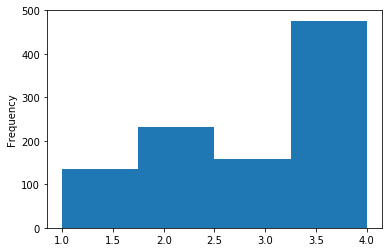

In [32]:
credit_new['payment_pcnt_income'].plot.hist(bins=4)

#### CONVERT CATEGORICAL FEATURES TO NUMERICAL FEATURES

In [33]:
print("Shape of data before encoding is", credit_new.shape)

Shape of data before encoding is (1000, 20)


In [34]:
credit_new = pd.get_dummies(credit_new)
print("New shape of data after encoding is", credit_new.shape)

New shape of data after encoding is (1000, 61)


In [35]:
credit_new.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,checking_account_status_0 - 200 DM,checking_account_status_< 0 DM,checking_account_status_> 200 DM or salary assignment,...,home_ownership_own,home_ownership_rent,job_category_highly skilled,job_category_skilled,job_category_unemployed-unskilled-non-resident,job_category_unskilled-resident,telephone_none,telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


### NORMALIZED OUR DATA

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [47]:
scaler = StandardScaler()
scaler.fit(credit_new)
credit_new2 = scaler.transform(credit_new)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### SPLIT DATA INTO TRAINING AND TEST SETS

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(credit_new2, y_target, test_size = 0.2)

In [52]:
print("shape of training data is", X_train.shape)
print("shape of training target is", y_train.shape)
print("shape of test data is", X_test.shape)
print("shape of test target is", y_test.shape)

shape of training data is (800, 61)
shape of training target is (800,)
shape of test data is (200, 61)
shape of test target is (200,)


## MODELLING

### Using logistic regression model


In [53]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
lr_pred = log_reg_model.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
acc = accuracy_score(y_test, lr_pred)
print("Accuracy is ", round(acc * 100))

Accuracy is  76.0


In [66]:
conf = confusion_matrix(y_test, lr_pred)

array([[125,  21],
       [ 26,  28]], dtype=int64)

In [65]:
print('                 Score positive    Score negative')
print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
print('')

                 Score positive    Score negative
Actual positive       125                21
Actual negative        26                28



### USING RANDOMFOREST CLASSIFIER

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=21)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=21, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [144]:
rf_pred = rf_model.predict(X_test)

In [145]:
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy is ", round(rf_acc * 100))

Accuracy is  79.0


In [131]:
rf_conf = confusion_matrix(y_test, rf_pred)
rf_conf

array([[139,   7],
       [ 35,  19]], dtype=int64)

### USING BOOSTING

In [132]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [141]:
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [142]:
gb_acc = accuracy_score(y_test, gb_pred)
print("Accuracy is ", round(gb_acc * 100))

Accuracy is  80.0


In [154]:
ada_model = AdaBoostClassifier(n_estimators=50)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

In [155]:
ada_acc = accuracy_score(y_test, ada_pred)
print("Accuracy is ", round(ada_acc * 100))

Accuracy is  77.0


### AVERAGING TWO MODELS

In [162]:
avg = np.int16((rf_pred + gb_pred + ada_pred) / 3)
avg_acc = accuracy_score(y_test, avg)
print("Accuracy is ", round(avg_acc * 100))

Accuracy is  79.0
